(-0.5, 27.5, 27.5, -0.5)

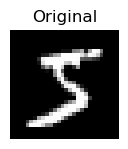

In [10]:
#1. Dataset Preparation:
#• Select an image dataset suitable for the task (e.g., MNIST, CIFAR-10).
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(train, _), (test, _) = mnist.load_data()

# Preprocess the images
train = train.astype('float32') / 255.0
test = test.astype('float32') / 255.0

plt.subplot(3, 1, 1)
plt.imshow(train[0], cmap='gray')
plt.title('Original')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

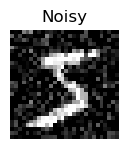

In [11]:
#• Preprocess the images (e.g., normalization) and introduce random noise to create noisy versions of the images.
noise = 0.2
train_noisy = train + noise * np.random.normal(loc=0.0, scale=1.0, size=train.shape)
test_noisy = test + noise * np.random.normal(loc=0.0, scale=1.0, size=test.shape)
train_noisy = np.clip(train_noisy, 0., 1.)
test_noisy = np.clip(test_noisy, 0., 1.)

plt.subplot(3, 1, 1)
plt.imshow(train_noisy[0], cmap='gray')
plt.title('Noisy')
plt.axis('off')

In [12]:
#2. Model Architecture:
#• Design a basic autoencoder architecture with an encoder and decoder component.
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape

input_img = Input(shape=(28, 28))
flattened_input_img = Flatten()(input_img)

encoded = Dense(128, activation='relu')(flattened_input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

output_img = Reshape((28, 28))(decoded)

autoencoder = Model(input_img, output_img)

In [13]:
#model training
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(train_noisy, train, epochs=10, batch_size=128, shuffle=True, validation_data=(test_noisy, test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.0747 - val_loss: 0.0283
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0270 - val_loss: 0.0225
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0219 - val_loss: 0.0194
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0194 - val_loss: 0.0179
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0179 - val_loss: 0.0164
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0166 - val_loss: 0.0156
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0157 - val_loss: 0.0150
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0150 - val_loss: 0.0144
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0145 - val_loss: 0.0140
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0140 - val_loss: 0.0134


In [14]:
#4. Model Evaluation:
#• Evaluate the trained model on a separate set of noisy images using relevant evaluation metrics such as mean squared error or structural similarity index (SSIM).

from sklearn.metrics import mean_squared_error

predicted = autoencoder.predict(test_noisy)

test_flat = test.reshape(-1, 28*28)
predicted_flat = predicted.reshape(-1, 28*28)

# Calculate the mean squared error
mse = mean_squared_error(test_flat, predicted_flat)

print("Mean Squared Error:", mse)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Squared Error: 0.013408639


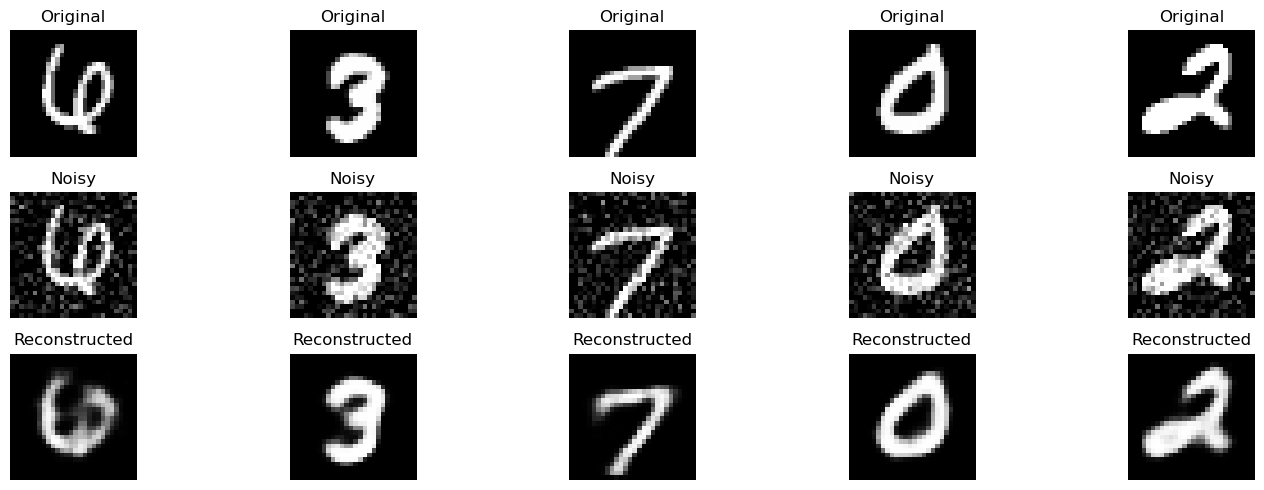

In [15]:
#Visualize the reconstructed images and compare them with the ground truth to assess the model's performance.
#showing 5 images

num_images = 5
random_indices = np.random.choice(len(test), num_images)

# Plot original images, noisy images, and reconstructed images
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    # Original image
    plt.subplot(3, num_images, i + 1)
    plt.imshow(test[idx], cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    # Noisy image
    plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(test_noisy[idx], cmap='gray')
    plt.title('Noisy')
    plt.axis('off')
    
    # Reconstructed image
    plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(predicted[idx], cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#Hyperparameter Tuning:
